## Proyek Analisis Data : E-Commerce-Public Data Set
- Nama            : Andrezki Pramudya
- Email           : andrezki.pramudya09@gmail.com
- Id Dicoding     : andrezki_pramudya_UPop

## Menentukan Pertanyaan Bisnis
- Bagaimanakah trend penjualan dalam 3 tahun ?
- Produk apakah yang paling laris dibeli customer dari E-Commerce?
- Orderan terbanyak berasal dari daerah mana saja?
- Bagaimana Demografi Customer yang kita miliki? 
- Bagaimana Demografi seller yang kita miliki ?

## Menyiapkan Semua Library yang Dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpi

## Data Wrangling With Python

### Gathering Data Menggunakan Pandas

In [2]:
#memuat data orders_dataset
import pandas as pd
orders_dataset_df = pd.read_csv(r"C:\Users\user\Downloads\Submission Proyek Analisis Data dengan Python-Andrezki Pramudya\Data\orders_dataset.csv")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
#memuat data customers_dataset
customers_df = pd.read_csv(r"C:\Users\user\Downloads\Submission Proyek Analisis Data dengan Python-Andrezki Pramudya\Data\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
#memuat data order_items_dataset
order_item_df = pd.read_csv(r"C:\Users\user\Downloads\Submission Proyek Analisis Data dengan Python-Andrezki Pramudya\Data\order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
#memuat data products_dataset
product_df = pd.read_csv(r"C:\Users\user\Downloads\Submission Proyek Analisis Data dengan Python-Andrezki Pramudya\Data\products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
#memuat data sellers_dataset
sellers_df = pd.read_csv(r"C:\Users\user\Downloads\Submission Proyek Analisis Data dengan Python-Andrezki Pramudya\Data\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
#memuat data geolocation_dataset
geo_df = pd.read_csv(r"C:\Users\user\Downloads\Submission Proyek Analisis Data dengan Python-Andrezki Pramudya\Data\geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
#memuat data order_payment_dataset
order_payment_df = pd.read_csv(r"C:\Users\user\Downloads\Submission Proyek Analisis Data dengan Python-Andrezki Pramudya\Data\order_payments_dataset.csv")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
#memuat data order_review_dataset
order_review_df = pd.read_csv(r"C:\Users\user\Downloads\Submission Proyek Analisis Data dengan Python-Andrezki Pramudya\Data\order_reviews_dataset.csv")
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
#memuat data product_category_dataset
product_category_df = pd.read_csv(r"C:\Users\user\Downloads\Submission Proyek Analisis Data dengan Python-Andrezki Pramudya\Data\product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Assessing Data

setelah berhasil melakukan gathering data maka selanjutnya kita akan melakukan assesing data dengan beberapa proses yaitu : 
- mengecek data dengan melihat info dari masing-masing data frame.
- mengecek apakah terdapat null pada setiap Data Frame.
- Mengecek apakah terdapat data duplikat pada Data Frame.
- Melihat describe data secara keseluruhan.

1. Mengecek info dari masing-masing Data Frame

In [13]:
orders_dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
customers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [29]:
order_item_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [30]:
product_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [31]:
sellers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [32]:
geo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [33]:
order_payment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [34]:
order_review_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [35]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


2. mengecek apakah terdapat null pada semua Data Frame

In [50]:
print('\nInfo data null customers:\n', customers_df.isnull().sum())
print('\nInfo data null geolocation:\n', geo_df.isnull().sum())
print('\nInfo data null order items:\n', order_item_df.isnull().sum())
print('\nInfo data null order payments:\n', order_payment_df.isnull().sum())
print('\nInfo data null order reviews:\n', order_review_df.isnull().sum())
print('\nInfo data null orders:\n', orders_dataset_df.isnull().sum())
print('\nInfo data null product category:\n', product_category_df.isnull().sum())
print('\nInfo data null products:\n', product_df.isnull().sum())
print('\nInfo data null sellers:\n', sellers_df.isnull().sum())


Info data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Info data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_cre

3. Mengecek nilai duplikat pada setiap Data Frame

In [51]:
print('\nInfo data duplicate customers:\n', customers_df.duplicated().sum())
print('\nInfo data duplicate geolocation:\n', geo_df.duplicated().sum())
print('\nInfo data duplicate order items:\n', order_item_df.duplicated().sum())
print('\nInfo data duplicate order payments:\n', order_payment_df.duplicated().sum())
print('\nInfo data duplicate order reviews:\n', order_review_df.duplicated().sum())
print('\nInfo data duplicate orders:\n', orders_dataset_df.duplicated().sum())
print('\nInfo data duplicate product category:\n', product_category_df.duplicated().sum())
print('\nInfo data duplicate products:\n', product_df.duplicated().sum())
print('\nInfo data duplicate sellers:\n', sellers_df.duplicated().sum())


Info data duplicate customers:
 0

Info data duplicate geolocation:
 261831

Info data duplicate order items:
 0

Info data duplicate order payments:
 0

Info data duplicate order reviews:
 0

Info data duplicate orders:
 0

Info data duplicate product category:
 0

Info data duplicate products:
 0

Info data duplicate sellers:
 0


4. Melakukan decribe pada setiap Data Frame

In [52]:
print('\nData Describe Customers:\n', customers_df.describe(include = 'all'))
print('\nData Describe geolocation:\n', geo_df.describe(include = 'all'))
print('\nData Describe order items:\n', order_item_df.describe(include = 'all'))
print('\nData Describe order payments:\n', order_payment_df.describe(include = 'all'))
print('\nData Describe order reviews:\n', order_review_df.describe(include = 'all'))
print('\nData Describe orders:\n', orders_dataset_df.describe(include = 'all'))
print('\nData Describe product category:\n', product_category_df.describe(include = 'all'))
print('\nData Describe products:\n', product_df.describe(include = 'all'))
print('\nData Describe:\n', sellers_df.describe(include = 'all'))


Data Describe Customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix cus

## Cleaning Data
Setelah selesai melakukan assesing data maka tahapan berikutnya yaitu melakukan cleaning data agar dapat diproses untuk Exploration Data Analysis.  
Tahapan yang akan dilakukan yaitu : 
- Mengatasi duplicate data pada Data Frame
- mengatasi missing value pada Data Frame

**Membersihkan Data customers_dataset**

In [53]:
"""
Data pada customer_dataset setelah dilakukan assesing
 tidak terdapat masalah sehingga data sudah bersih.
"""

'\nData pada customer_dataset setelah dilakukan assesing\n tidak terdapat masalah sehingga data sudah bersih.\n'

**Membersihkan Data product_dataset**

In [54]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [55]:
#menghapus baris yang terdapat missing value pada kolom product_category_name
product_df.dropna(axis=0, subset=['product_category_name'], inplace=True)

In [56]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [57]:
#melihat baris data yang mengandung missing value pada kolom product_weight_g
product_df[product_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [58]:
# Mengisi missing value pada product_weight_g, product_length_cm, product_height_cm, dan product_width_cm dengan nilai mean
product_df.product_weight_g.fillna(value=product_df.product_weight_g.mean(), inplace=True)
product_df.product_length_cm.fillna(value=product_df.product_length_cm.mean(), inplace=True)
product_df.product_height_cm.fillna(value=product_df.product_height_cm.mean(), inplace=True)
product_df.product_width_cm.fillna(value=product_df.product_width_cm.mean(), inplace=True)

In [14]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### Membersihkan Data pada seller_dataset

In [60]:
#data seller_dataset bersih setelah di assessing

#### Membersihkan Data padaorder_items_dataset

In [61]:
#mengganti tipe data pada kolom shipping_limit_dataset menjadi datetime
datetime_column = ['shipping_limit_date']
for column in datetime_column:
    order_item_df[column]= pd.to_datetime(order_item_df[column])

In [62]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [63]:
# Menampilkan baris data yang memiliki nilai price minimum
order_item_df[order_item_df.price == order_item_df.price.min()] 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30


In [64]:
# Mengganti value price 0.85 menjadi 1.20
order_item_df.replace({'price': 0.85}, 1.20, inplace=True)

In [65]:
order_item_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653748,19.990320
min,1.000000,2016-09-19 00:15:34,1.200000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633922,15.806405


#### Membersihkan Data pada order_payment_dataset

In [44]:
# Data pada order_payment_dataset sudah bersih setelah dilakukan assessing. 

#### Membersihkan data pada order_dataset

In [66]:
'''Mengganti tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date,
order_delivered_customer_date, dan order_estimated_delivery_date menjadi datetime'''
datetime_column = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
"order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_column:
    orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])

In [67]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [68]:
# Melihat data yang mengandung missing value pada column order_approved_at
orders_dataset_df[orders_dataset_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [69]:
# Mengisi data yang mengandung missing value pada kolom order_approved_at
orders_dataset_df.order_approved_at.fillna(value=0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2720\2635623975.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders_dataset_df.order_approved_at.fillna(value=0, inplace=True)


In [70]:
#Mengisi data yang mengandung missing value pada kolom order_delivered_carrier_date
orders_dataset_df.order_delivered_carrier_date.fillna(value=0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2720\1423561439.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders_dataset_df.order_delivered_carrier_date.fillna(value=0, inplace=True)


In [71]:
# Mengisi data yang mengandung missing value pada kolom order_delivered_customer_date
orders_dataset_df.order_delivered_customer_date.fillna(value=0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2720\2240632197.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders_dataset_df.order_delivered_customer_date.fillna(value=0, inplace=True)


In [72]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  object        
 5   order_delivered_carrier_date   99441 non-null  object        
 6   order_delivered_customer_date  99441 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [73]:
'''Mengganti tipe data pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date 
menjadi datetime'''
datetime_column = ["order_approved_at", "order_delivered_carrier_date","order_delivered_customer_date"]

for column in datetime_column:
    orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])

In [74]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Explonatory Data Analysis (EDA)

#### Ekploratory data analysis customers_dataset

In [75]:
# Melihat rangkuman parameter statistik dari data customers_dataset
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [76]:
# Melihat demografi pelanggan berdasarkan kota
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [77]:
# Melihat demografi pelanggan berdasarkan state
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

#### Eksploratory Data Analaysis product_dataset

In [78]:
# Melihat rangkuman parameter statistik dari data product_dataset
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341,32341,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000
unique,32341,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245741,635.115225,1.736766,4279.225683,16.955703,13.635904,12.078575
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [79]:
# Melihat jumlah produk berdasarkan pada nama kategori produk
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

#### Eksploratory Data Anaysis seller_dataset

In [80]:
# Melihat rangkuman parameter statistik dari data seller_dataset
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [81]:
# Melihat demografi penjual berdasarkan kota
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [82]:
# Melihar demografi Seller berdasarkan Negara
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

#### Ekloratory data analysis order_items_dataset

In [83]:
# Melihat parameter statistik data oder_item_dataset 
order_item_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653748,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,1.200000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [84]:
# Melihat jumlah order berdasarkan harganya
order_item_df.groupby(by = "price").order_item_id.nunique().sort_values(ascending=False)

price
1.20       20
98.70      20
100.00     20
51.00      15
65.49      15
           ..
29.35       1
131.10      1
131.17      1
29.33       1
6735.00     1
Name: order_item_id, Length: 5967, dtype: int64

In [85]:
# Melihat jumlah order item berdasarkan harga transportasi
order_item_df.groupby(by = "freight_value").order_item_id.nunique().sort_values(ascending=False)

freight_value
10.12     20
14.44     20
7.89      20
16.22     15
1.20      15
          ..
42.79      1
42.81      1
42.82      1
42.83      1
409.68     1
Name: order_item_id, Length: 6999, dtype: int64

#### Ekslporatory data order_payment_dataset

In [86]:
# Melihat parameter statistik dari data order_payment_dataset
order_payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [87]:
# melihat pembayaran berdasarkan nilainya
order_payment_df.groupby(by="payment_value").order_id.nunique().sort_values(ascending=False)

payment_value
50.00       293
77.57       250
100.00      249
35.00       165
73.34       160
           ... 
222.07        1
222.09        1
222.11        1
222.15        1
13664.08      1
Name: order_id, Length: 29077, dtype: int64

#### Eksloratory data order_dataset

In [88]:
# Melihat parameter statistik dari data oder_dataset
orders_dataset_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-03 13:35:07.539676672,2017-02-24 11:40:50.281151744,2016-08-09 08:35:14.129111552,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 09:45:41,2017-09-07 00:22:29,2017-09-11 18:11:36,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 01:39:19,2018-01-19 21:29:35,2018-01-27 14:47:23,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-07 13:30:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [89]:
# Melihat jumlah order berdasarkan order status
orders_dataset_df.groupby(by = "order_status").order_id.nunique().sort_values(ascending = False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

#### Eksploratory data customer_dataset dan order_dataset

In [90]:
# Menggabungkan data orders_dataset dan customers_dataset
orders_customers_dataset = pd.merge(
    left=orders_dataset_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [91]:
# 10 order tertinggi berdasarkan kota
orders_customers_dataset.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)


,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [92]:
# 10 order terendah berdasarkan kota
orders_customers_dataset.groupby(by="customer_city").order_id.nunique().sort_values(ascending=True).reset_index().head(10)


,customer_city,order_id
0,lagoao,1
1,pedro gomes,1
2,caraibas,1
3,japoata,1
4,pedro velho,1
5,peixe,1
6,caracol,1
7,flora rica,1
8,florania,1
9,capivari do sul,1


In [93]:
# 10 order tertinggi berdasarkan state
orders_customers_dataset.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)


,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [94]:
# 10 order terendah  berdasarkan state
orders_customers_dataset.groupby(by="customer_state").order_id.nunique().sort_values(ascending= True).reset_index().head(10)


,customer_state,order_id
0,RR,46
1,AP,68
2,AC,81
3,AM,148
4,RO,253
5,TO,280
6,SE,350
7,AL,413
8,RN,485
9,PI,495


#### Melakukan Eksploratory data product_dataset dan order_items_dataset

In [95]:
# Menggabungkan data products_dataset dan order_items_dataset
order_items_products_dataset = pd.merge(
    left=order_item_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_products_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [96]:
# 10 produk yang paling laris
order_items_products_dataset.groupby(by="product_category_name").order_id.nunique().sort_values(ascending= False).reset_index().head(10)


,product_category_name,order_id
0,cama_mesa_banho,9417
1,beleza_saude,8836
2,esporte_lazer,7720
3,informatica_acessorios,6689
4,moveis_decoracao,6449
5,utilidades_domesticas,5884
6,relogios_presentes,5624
7,telefonia,4199
8,automotivo,3897
9,brinquedos,3886


In [97]:
# 10 produk yang kurang diminati
order_items_products_dataset.groupby(by="product_category_name").order_id.nunique().sort_values(ascending= True).reset_index().head(10)


,product_category_name,order_id
0,seguros_e_servicos,2
1,fashion_roupa_infanto_juvenil,8
2,pc_gamer,8
3,cds_dvds_musicais,12
4,la_cuisine,13
5,portateis_cozinha_e_preparadores_de_alimentos,14
6,artes_e_artesanato,23
7,casa_conforto_2,24
8,fraldas_higiene,27
9,fashion_esporte,27


#### Eploratory data order_item_dataset dan order_dataset

In [98]:
# Menggabungkan data order_items_dataset dan orders_dataset
order_items_orders_dataset = pd.merge(
    left=order_item_df,
    right=orders_dataset_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_orders_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [99]:
# Menghapus pesanan yang di cancel
order_items_orders_dataset[order_items_orders_dataset.order_status != 'canceled']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [100]:
# Melihat penjualan berdasarkan order_purchase_timestamp
order_items_orders_dataset.groupby(by="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by="order_purchase_timestamp", ascending=True).reset_index()

,order_purchase_timestamp,order_id,order_item_id,price
0,2016-09-04 21:15:19,1,3,72.89
1,2016-09-05 00:15:34,1,1,59.50
2,2016-09-15 12:16:38,1,6,134.97
3,2016-10-02 22:07:52,1,1,100.00
4,2016-10-03 09:44:50,1,1,29.90
...,...,...,...,...
98107,2018-08-29 14:18:23,1,3,418.00
98108,2018-08-29 14:18:28,1,1,45.90
98109,2018-08-29 14:52:00,1,1,24.90
98110,2018-08-29 15:00:37,1,1,84.99


#### Eksploratory untuk semua Data

In [101]:
# Menggabungkan data orders_dataset, customers_dataset, products_dataset, dan order_items_dataset
x_df = pd.merge(
    left=orders_customers_dataset, # Berisi orders_dataset dan customers_dataset
    right=order_items_products_dataset, # Berisi order_items_dataset dan products_dataset
    how="left",
    left_on="order_id",
    right_on="order_id"
)
x_df

# Menggabungkan dataset x_df dan sellers_dataset
y_df = pd.merge(
    left=x_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
y_df

# Menggabungkan dataset y_df dan order_payments_dataset menjadi all_df (semua kumpulan dataset yang dibutuhkan dalam analisis ini)
all_df = pd.merge(
    left=y_df,
    right=order_payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,19.0,13.0,19.0,31570.0,belo horizonte,SP,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,24.0,19.0,21.0,14840.0,guariba,SP,1.0,credit_card,3.0,179.12


In [104]:
all_df.to_csv("C:\\Users\\user\\Downloads\\E-commerce-public-dataset\\E-Commerce Public Dataset\\main_data.csv", index = False)

#### Visualization and EDA 

#### 1. Bagaimana trend penjualan selama 3 tahun terakhir?

In [106]:
# Melihat trend penjualan (revenue) per bulan
monthly_orders_df = order_items_orders_dataset.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id":"nunique",
    "price":"sum"
})


monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_df

,order_purchase_timestamp,order_count,revenue
0,2016-09,3,267.36
1,2016-10,308,49507.66
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,789,120312.87
5,2017-02,1733,247303.02
6,2017-03,2641,374344.30
7,2017-04,2391,359927.23
8,2017-05,3660,506071.14
9,2017-06,3217,433038.60


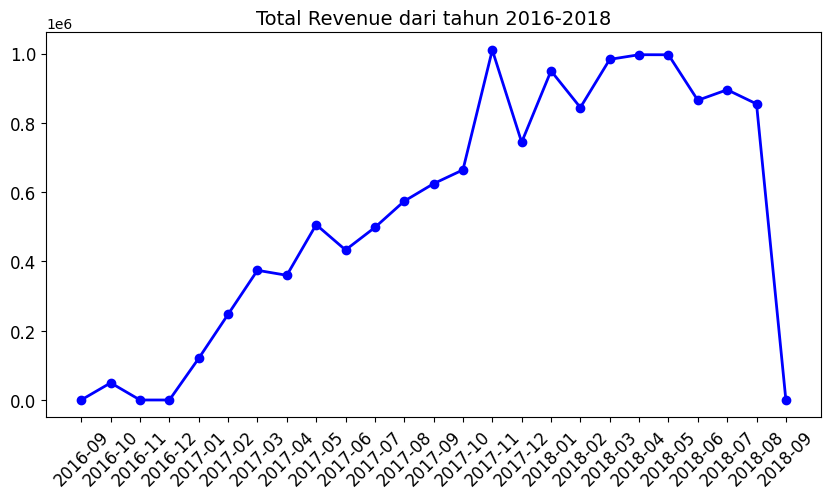

In [107]:
# menampilkan tren penjualan (revenue) menggunakan visualisasi line chart.
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="blue"
)

plt.title("Total Revenue dari tahun 2016-2018", loc="center", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


#### 2. Produk apa yang paling laris dibeli oleh customers?

In [108]:
# menampilan 10 produk yang paling laris berdasarkan jumlah order.
sum_order_items_df = order_items_products_dataset.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name,order_item_id
0,cama_mesa_banho,13665
1,moveis_decoracao,11540
2,beleza_saude,11081
3,esporte_lazer,9932
4,informatica_acessorios,9874
5,utilidades_domesticas,9051
6,relogios_presentes,6594
7,ferramentas_jardim,5874
8,telefonia,5161
9,automotivo,4881


C:\Users\user\AppData\Local\Temp\ipykernel_2720\3035565087.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=False).head(10), palette=colors, ax=ax)


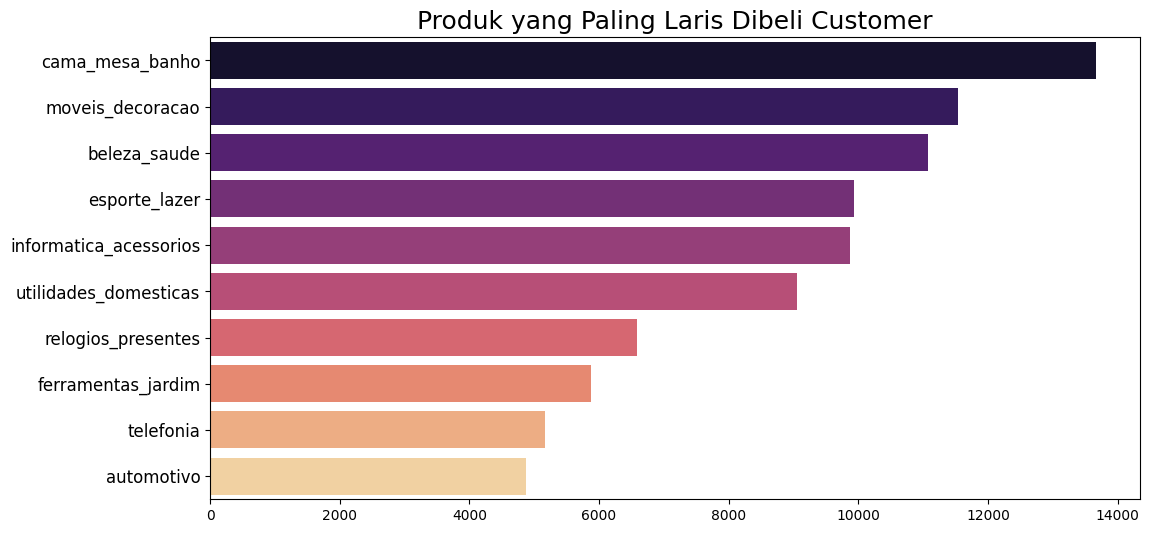

C:\Users\user\AppData\Local\Temp\ipykernel_2720\3035565087.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(10), palette=colors, ax=ax)


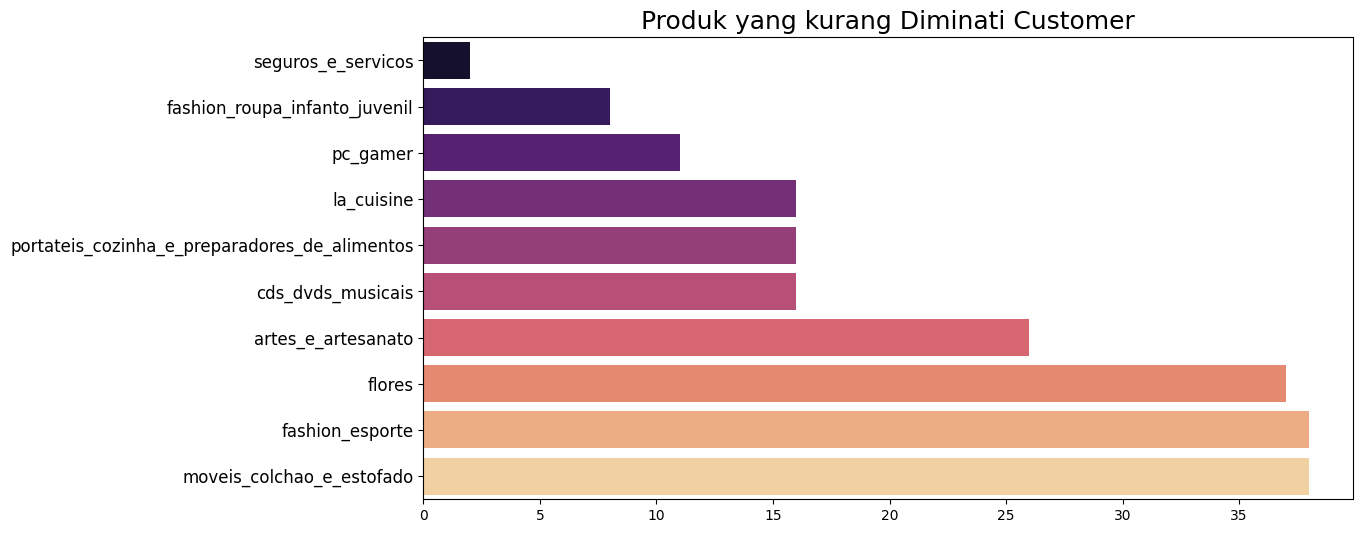

In [109]:

fig, ax = plt.subplots(figsize=(12, 6))
colors = "magma"

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=False).head(10), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Produk yang Paling Laris Dibeli Customer", loc="center", fontsize=18)
ax.tick_params(axis='y', labelsize=12)
plt.show()

# Plot produk yang paling sedikit diminati
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(10), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Produk yang kurang Diminati Customer", loc="center", fontsize=18)
ax.tick_params(axis='y', labelsize=12)
plt.show()

#### 3. Orderan terbanyak berdasarkan daerah (state dan city)

In [112]:
top10_city_df

,customer_city,customer_count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


C:\Users\user\AppData\Local\Temp\ipykernel_2720\3409409260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


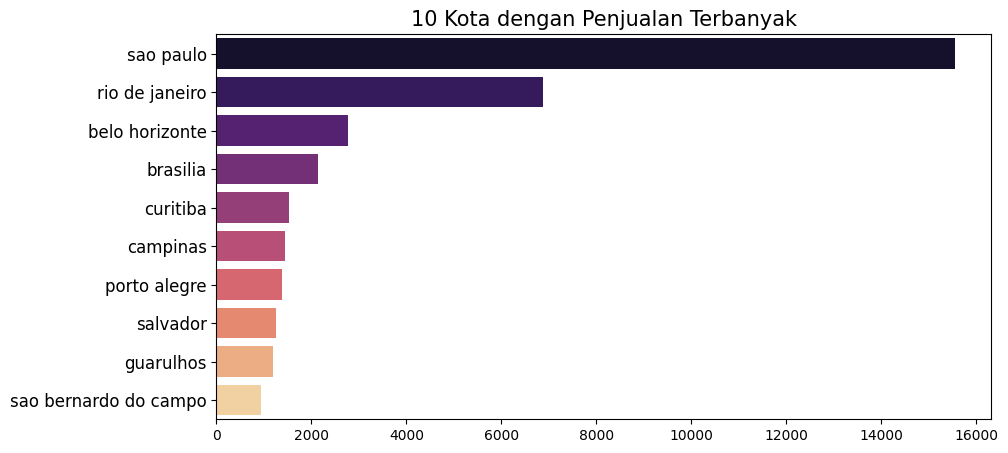

In [111]:
top10_city_df = orders_customers_dataset.groupby("customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)
top10_city_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
top10_city_df
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=top10_city_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("10 Kota dengan Penjualan Terbanyak", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### 4. Bagaimana Demografi Customer yang kita miliki?

In [98]:
# Menampilkan Demografi Pelanggan/ Customer
other_state_geolocation = geo_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geo_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)
     

In [99]:
geolocation_silver = geo_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')
     

In [100]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')
     

In [101]:
customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822


In [109]:
customers_silver.to_csv("geolocation.csv", index=False)

In [114]:
import urllib
import unidecode
import matplotlib.image as mpimg

In [111]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

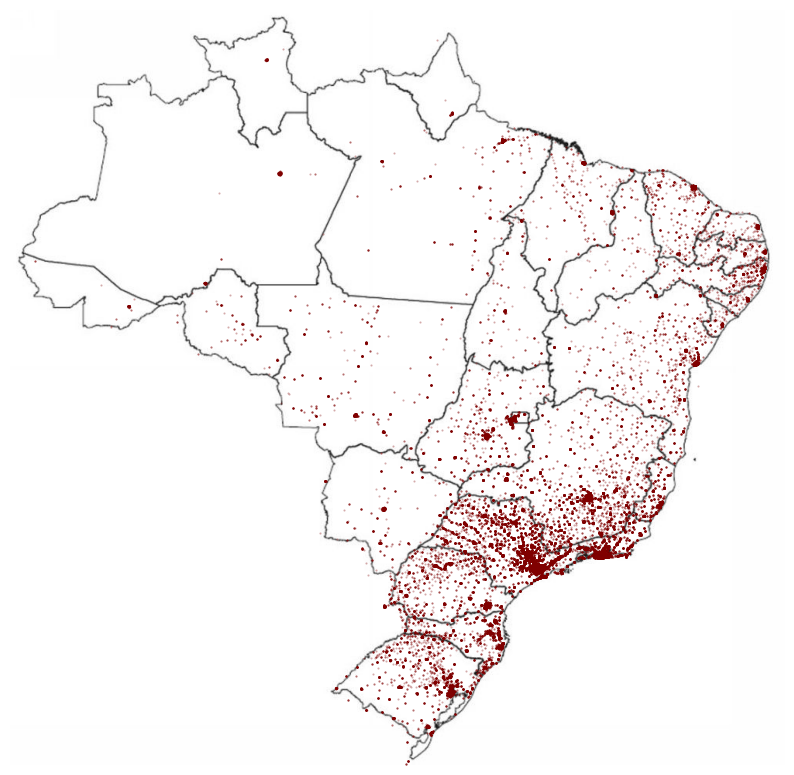

In [115]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

#### 5. Bagaimana Demografi Seller yang kita miliki?

C:\Users\user\AppData\Local\Temp\ipykernel_14316\1985777694.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


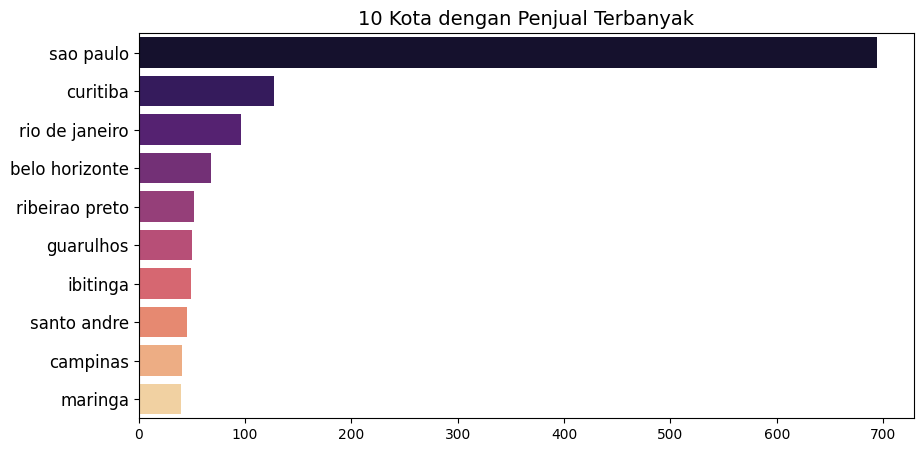

In [88]:
# Menampilkan 10 kota dengan penjual terbanyak dalam bentuk bar plot
seller_df = sellers_df.groupby("seller_city").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)
seller_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
seller_df
plt.figure(figsize=(10, 5))
sns.barplot(
    x="seller_count",
    y="seller_city",
    data=seller_df.sort_values(by="seller_count", ascending=False),
    palette=colors
)
plt.title("10 Kota dengan Penjual Terbanyak", loc="center", fontsize=14)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Conclusion

##### 1. Trend Penjualan Selama 3 Tahun

Berdasarkan hasil visualisasi dan Eksploratory data dapat disimpulkan bahwa penjualan dari tahun 2016 hingga 2018 mengalami tren fluktuatif. Penjualan tertinngi terjadi pada bulan Oktober 2017 namun terjadi penurunan signifikan pada bulan Agustus 2018. Hal ini perlu di analisis lebih dalam untuk mengambil keputusan yang tepat dalam peningkatan penjualan di tahun berikutnya. 

##### 2. Produk yang paling laris terjual

Melalui hasil eksploratory data analysis dan hasil visualisasi data menggunakan diagram batang dapat dilihat bahwa terdapat 10 produk yang paling banyak diminati customer / paling laku di pasaran yaitu cama_mesa_banho, moveis_decoracao, bleza_saude, esporte_lazer, informatica_accessorios, untilidades_domesticas, relogios_presentes,ferramentas_jardim,telefonia,automativo, yang mana jumlah order tertinggi dihasilkan dari produk cama_mesa_banho sejumlah 13665 pcs. Sedangkan produk yang kurang laku di pasaran yang berada di urutan 3 besar yaitu seguros_e_services, fashion_roupa_infanto_jurenil, dan pc_games. Untuk itu kita harus memperhatikan stock produk khususnya pada produk yang paling laris diminati untuk selalu tersedia di berbagai lokasi seller.  

##### 3. Orderan terbanyak berasal dari mana saja?


Berdasarkan hasil visualisasi data terdapat 10 kota yang menjadi tempat transaksi penjualan terbanyak yaitu Sao Paulo, Curitiba, Carpinas, Porto Alegre, Solvador, Rio De Jeneiro, Belo Horizonte, Brasilia,
Guarulhos, dan Sao Bernando Do Campo. Kemudian penjualan terbanyak berasal dari kota Sao Paulo dengan total 15540 jumlah pesanan dari berbagai customer. 

##### 4. Bagaiamana Demografi Customer?

Berdasarkan hasil visualisasi data menggunakan maps dapat terlihat customer tersebar dominan di area brazil selatan, hal tersebut ditandakan dengan banyaknya titik-titik yang bertumpuk di area tersebut. Kemudian jika di urutkan customer paling banyak berasal dari kota **Sao Paulo**.

##### 5. Bagaimana Demografi Penjual yang kita miliki?

Berdasarkan hasil visualisasi data menggunakan maps dapat terlihat seller berada di 10 tempat favorit yaitu Sao Paulo, Curitiba,Rio De Janeiro, Belo Horizonte, Ribeirao Preto, Guarulhos, Ibtinga, Santo Andre, Campinas dan Marinya. Seller paling banyak berada  di kota **Sao Paulo**.